In [1]:
# Importing needed libraries
import datetime
import pandas as pd

# Fetching the data from official site of Ministry of Health and Family Welfare | Government of India
try:
    url = "https://www.mohfw.gov.in/"
    dfs = pd.read_html(url)

    for i in range(len(dfs)):
        df = dfs[i]
        if (len(df.columns) == 6):
            cols_match = sum(df.columns==['S. No.', 'Name of State / UT', 'Active Cases*',
                               'Cured/Discharged/Migrated*', 'Deaths**', 'Total Confirmed cases*'])
            if (cols_match == 6):
                now = datetime.datetime.now()
                dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
                df.to_csv("/home/caesar/covid_19.csv")
                break
except:
    df = pd.read_csv("/home/caesar/covid_19.csv")
    df = df.drop(columns=["Unnamed: 0"]) 
    now = datetime.datetime.fromtimestamp(os.path.getmtime("/home/caesar/covid_19.csv"))
    dt_string = now.strftime("%d/%m/%Y %H:%M:%S")

df

,S. No.,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,1,Andaman and Nicobar Islands,0,33,0,33
1,2,Andhra Pradesh,1951,2682,75,4708
2,3,Arunachal Pradesh,50,1,0,51
3,4,Assam,1946,615,4,2565
4,5,Bihar,2578,2480,30,5088
5,6,Chandigarh,36,273,5,314
6,7,Chhattisgarh,786,283,4,1073
7,8,Dadar Nagar Haveli,18,2,0,20
8,9,Delhi,17125,10999,812,28936
9,10,Goa,235,65,0,300


In [2]:
# Preprocessing the column data to remove any special characters inbetween because we cannot rely on the source completely.
for col in ['Active Cases*', 'Cured/Discharged/Migrated*', 'Deaths**', 'Total Confirmed cases*' ]:
    if df[col].dtypes=='O':
        df[col] = df[col].str.replace('\W', '')

In [3]:
# Fetching out the values from the DataFrame 
m = 35
states = df["Name of State / UT"][:m]
active_cases = df["Active Cases*"][:m].astype(int)
confirmed_cases = df["Total Confirmed cases*"][:m].astype(int)
casualties = df["Deaths**"][:m].astype(int)

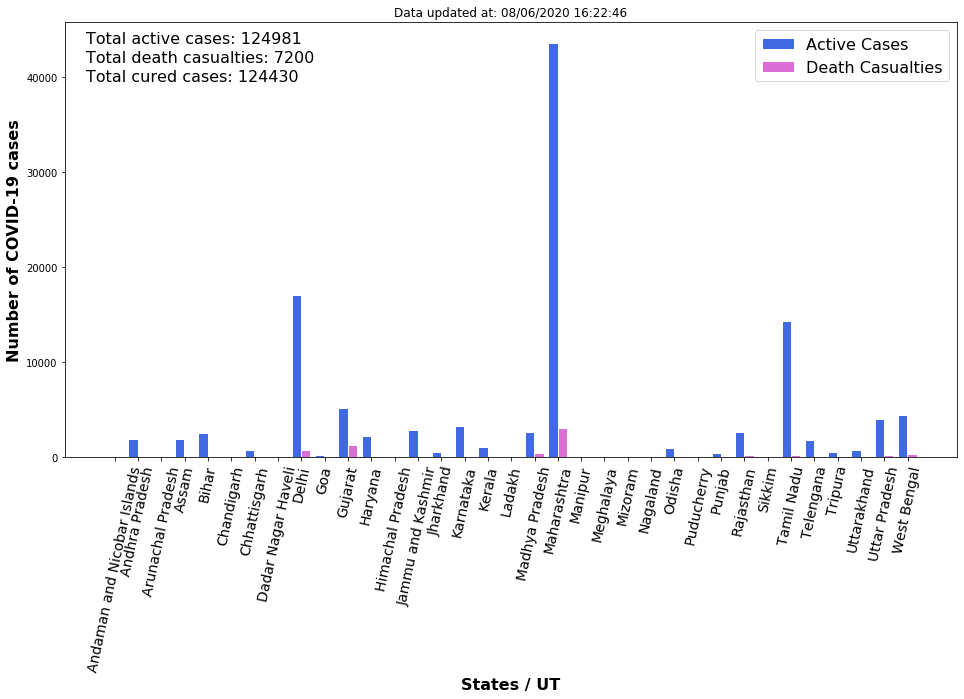

In [4]:
# Plotting the bar graph!
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

max_cases = max(active_cases)
total_active_cases = int(df["Active Cases*"][36])
total_death_casualties = df["Deaths**"][36]
total_cured_cases = df["Cured/Discharged/Migrated*"][36]
total_confirmed_cases = df["Total Confirmed cases*"][36]
barWidth = 0.4
r1 = np.arange(len(active_cases))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(16, 8))
plt.bar(r1, active_cases, color="royalblue", width=barWidth, edgecolor="white", label="Active Cases")
plt.bar(r2, casualties, color="orchid", width=barWidth, edgecolor="white", label="Death Casualties")
plt.xlabel("States / UT", fontweight="bold", fontsize=16)
plt.xticks([r + barWidth - 0.19 for r in range(len(active_cases))], states, rotation="78", fontsize=14)
plt.ylabel("Number of COVID-19 cases", fontweight="bold", fontsize=16)
plt.legend(fontsize=16, loc="upper right")
plt.text(-1, max_cases, "Total active cases: " + str(total_active_cases), fontsize=16)
plt.text(-1, max_cases - 2000, "Total death casualties: " + str(total_death_casualties), fontsize=16)
plt.text(-1, max_cases - 4000, "Total cured cases: " + str(total_cured_cases), fontsize=16)
plt.title("Data updated at: " + dt_string, loc="center")
plt.show()

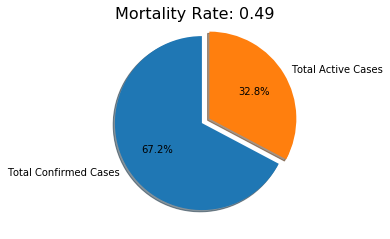

In [5]:
# A more visualistic comparison!

mortality_rate = str(round(total_active_cases / int(total_confirmed_cases), 2))
sizes=[total_confirmed_cases, total_active_cases]
names=["Total Confirmed Cases", "Total Active Cases"]
plt.pie(sizes, explode=(0, 0.1), labels=names, autopct='%1.1f%%', shadow=True, startangle=90)
plt.text(-1, 1.2, "Mortality Rate: " + mortality_rate, fontsize=16)
plt.show()

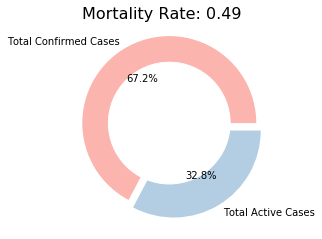

In [6]:
# In case you need a more fancy donut-like graph!
from palettable.colorbrewer.qualitative import Pastel1_7
sizes=[total_confirmed_cases, total_active_cases]
names=["Total Confirmed Cases", "Total Active Cases"]
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(sizes, labels=names, colors=Pastel1_7.hex_colors, autopct='%1.1f%%', explode=(0, 0.1))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.text(-1, 1.2, "Mortality Rate: " + mortality_rate, fontsize=16)
plt.show()